In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("~/Github/csv/top_25_games.csv")

## Verify the data imported correctly

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          25 non-null     object 
 1   platform      25 non-null     object 
 2   release_date  25 non-null     object 
 3   summary       25 non-null     object 
 4   meta_score    25 non-null     int64  
 5   user_review   25 non-null     float64
dtypes: float64(1), int64(1), object(4)
memory usage: 1.3+ KB


In [4]:
df.head()

,name,platform,release_date,summary,meta_score,user_review
0,The Legend of Zelda: Ocarina of Time,Nintendo 64,23-Nov-98,"As a young boy, Link is tricked by Ganondorf, ...",99,9.1
1,Tony Hawk's Pro Skater 2,PlayStation,20-Sep-00,As most major publishers' development efforts ...,98,7.4
2,Grand Theft Auto IV,PlayStation 3,29-Apr-08,[Metacritic's 2008 PS3 Game of the Year; Also ...,98,7.7
3,SoulCalibur,Dreamcast,08-Sep-99,"This is a tale of souls and swords, transcendi...",98,8.4
4,Grand Theft Auto IV,Xbox 360,29-Apr-08,[Metacritic's 2008 Xbox 360 Game of the Year; ...,98,7.9


## Check for missing values 

In [5]:
df.isna().sum()

name            0
platform        0
release_date    0
summary         0
meta_score      0
user_review     0
dtype: int64

## Change "release_date" object into a pandas date

In [6]:
pd.to_datetime(df['release_date'], dayfirst=True).head()

0   1998-11-23
1   2000-09-20
2   2008-04-29
3   1999-09-08
4   2008-04-29
Name: release_date, dtype: datetime64[ns]

In [7]:
df['release_date'] = pd.to_datetime(df['release_date'], dayfirst=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   name          25 non-null     object        
 1   platform      25 non-null     object        
 2   release_date  25 non-null     datetime64[ns]
 3   summary       25 non-null     object        
 4   meta_score    25 non-null     int64         
 5   user_review   25 non-null     float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 1.3+ KB


In [8]:
# Use dimension tables containing the distinct values and storing the primary 
# observations as integer keys referencing the dimension table.
# Basically make an object value into a pandas category value to represent integers.
df['platform'] = df['platform'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   name          25 non-null     object        
 1   platform      25 non-null     category      
 2   release_date  25 non-null     datetime64[ns]
 3   summary       25 non-null     object        
 4   meta_score    25 non-null     int64         
 5   user_review   25 non-null     float64       
dtypes: category(1), datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 1.8+ KB


In [9]:
## Group the data by platform 
df.groupby(by='platform').size()

platform
 Dreamcast        3
 GameCube         1
 Nintendo 64      2
 PC               2
 PlayStation      1
 PlayStation 2    2
 PlayStation 3    2
 PlayStation 4    2
 Switch           3
 Wii              2
 Xbox             1
 Xbox 360         2
 Xbox One         2
dtype: int64

<AxesSubplot:xlabel='platform'>

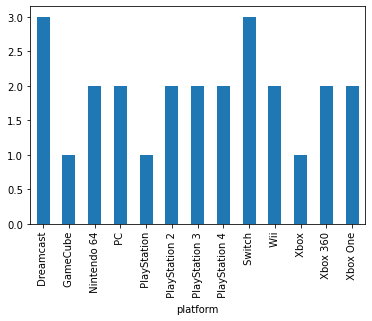

In [10]:
df.groupby(by='platform').size().plot.bar(x='platform')

<AxesSubplot:ylabel='Frequency'>

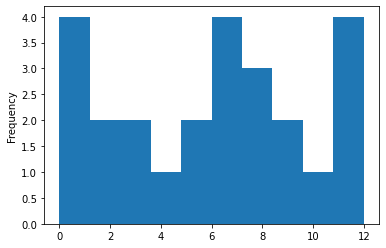

In [11]:
# Make a histogram from an object column
df['platform'].cat.codes.plot.hist()

In [28]:
# Sort it by platform
df.sort_values(by=['platform'], ascending=False).head(25)

,name,platform,release_date,summary,meta_score,user_review
7,Red Dead Redemption 2,Xbox One,2018-10-26,Developed by the creators of Grand Theft Auto ...,97,8.0
8,Grand Theft Auto V,Xbox One,2014-11-18,Grand Theft Auto 5 melds storytelling and game...,97,7.9
4,Grand Theft Auto IV,Xbox 360,2008-04-29,[Metacritic's 2008 Xbox 360 Game of the Year; ...,98,7.9
11,Grand Theft Auto V,Xbox 360,2013-09-17,Los Santos is a sprawling sun-soaked metropoli...,97,8.3
21,Halo: Combat Evolved,Xbox,2001-11-14,"Enter the mysterious world of Halo, an alien p...",97,8.7
5,Super Mario Galaxy,Wii,2007-11-12,[Metacritic's 2007 Wii Game of the Year] The u...,97,9.1
6,Super Mario Galaxy 2,Wii,2010-05-23,"Super Mario Galaxy 2, the sequel to the galaxy...",97,9.1
20,Super Mario Odyssey,Switch,2017-10-27,New Evolution of Mario Sandbox-Style Gameplay....,97,8.9
13,The Legend of Zelda: Breath of the Wild,Switch,2017-03-03,Forget everything you know about The Legend of...,97,8.7
22,The House in Fata Morgana - Dreams of the Reve...,Switch,2021-04-09,A gothic suspense tale set in a cursed mansion...,97,8.2
